In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

<ipython-input-3-84de6229f3ec>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette="coolwarm")


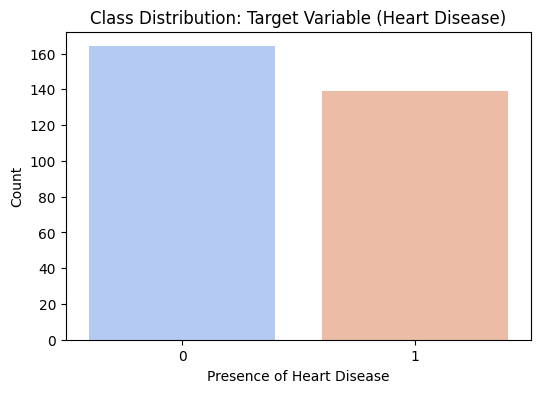

In [ ]:
# Load the Cleveland Heart Disease Dataset
data = pd.read_csv("Heart_disease_cleveland_new.csv")

# Data Preprocessing
data.fillna(data.median(), inplace=True)  # Handle missing values
categorical_features = ['sex', 'cp', 'restecg', 'slope', 'thal']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)  # Encode categorical variables

# Dataset Analysis Visualizations
# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette="coolwarm")
plt.title("Class Distribution: Target Variable (Heart Disease)")
plt.xlabel("Presence of Heart Disease")
plt.ylabel("Count")
plt.show()

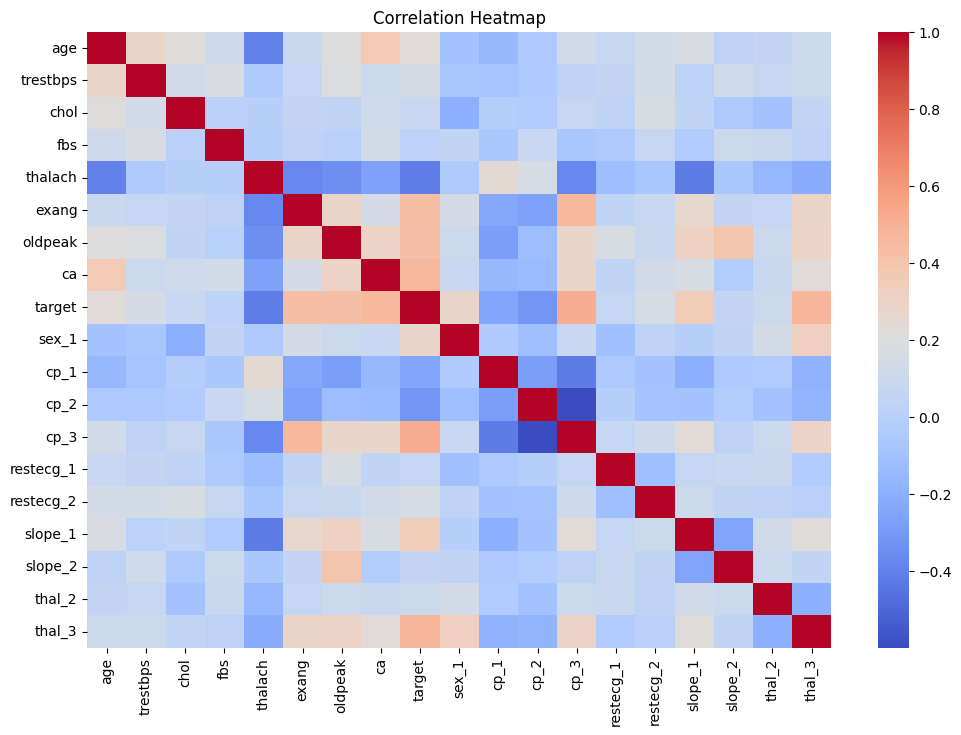

In [ ]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


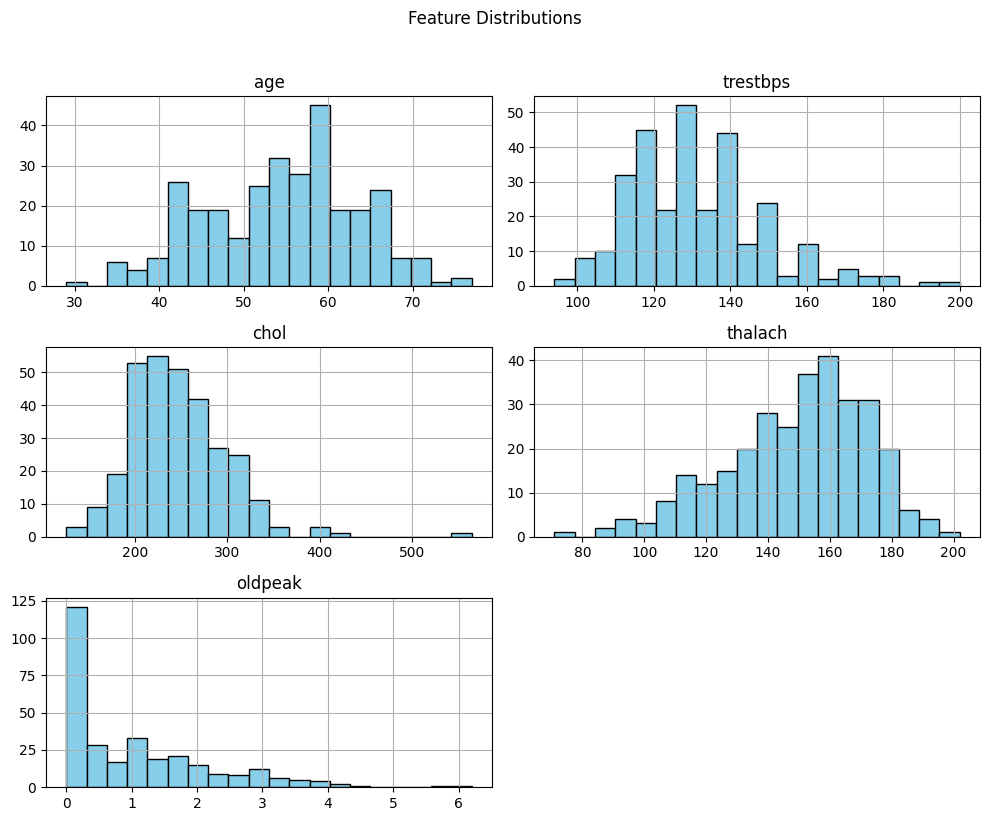

In [ ]:

# 3. Feature Distributions
features_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[features_to_plot].hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

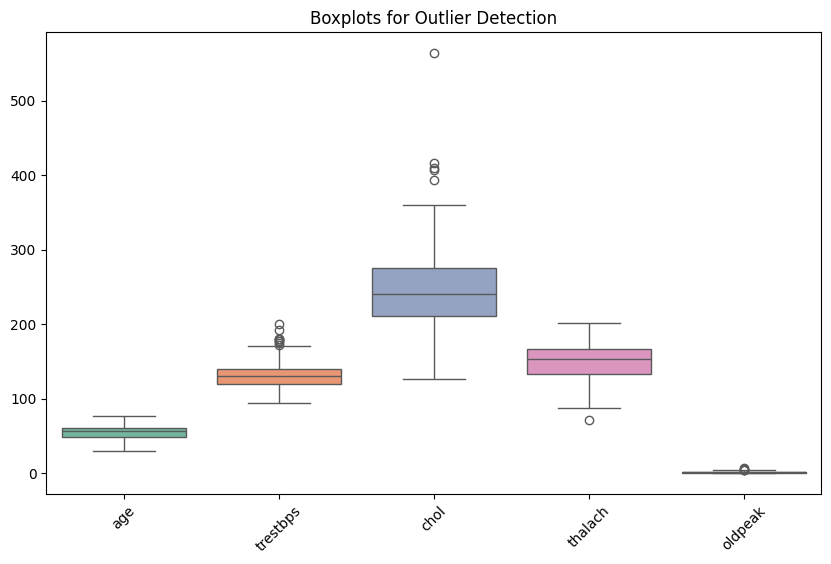

In [ ]:
# 4. Boxplots for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[features_to_plot], palette="Set2")
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Prepare Features and Target
X = data.drop('target', axis=1)
y = data['target']

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

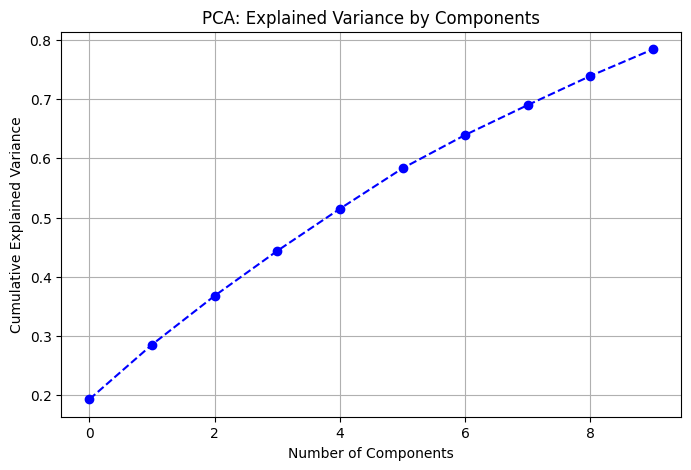

In [ ]:
# Feature Selection Using PCA
pca = PCA(n_components=10)  # Choose the number of components
X_pca = pca.fit_transform(X_resampled)

# Visualize PCA Variance Explained
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title('PCA: Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)


Evaluating Models Without PCA:

Logistic Regression:
Accuracy: 0.68
Precision: 0.74
Recall: 0.64
F1-Score: 0.69
AUC: 0.84
Confusion Matrix:
[[22  8]
 [13 23]]

Decision Tree:
Accuracy: 0.73
Precision: 0.76
Recall: 0.72
F1-Score: 0.74
AUC: 0.73
Confusion Matrix:
[[22  8]
 [10 26]]

Random Forest:
Accuracy: 0.74
Precision: 0.79
Recall: 0.72
F1-Score: 0.75
AUC: 0.89
Confusion Matrix:
[[23  7]
 [10 26]]

KNN:
Accuracy: 0.80
Precision: 0.81
Recall: 0.83
F1-Score: 0.82
AUC: 0.85
Confusion Matrix:
[[23  7]
 [ 6 30]]

SVM:
Accuracy: 0.76
Precision: 0.83
Recall: 0.69
F1-Score: 0.76
AUC: 0.87
Confusion Matrix:
[[25  5]
 [11 25]]

XGBoost:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:44:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.76
Precision: 0.79
Recall: 0.75
F1-Score: 0.77
AUC: 0.87
Confusion Matrix:
[[23  7]
 [ 9 27]]


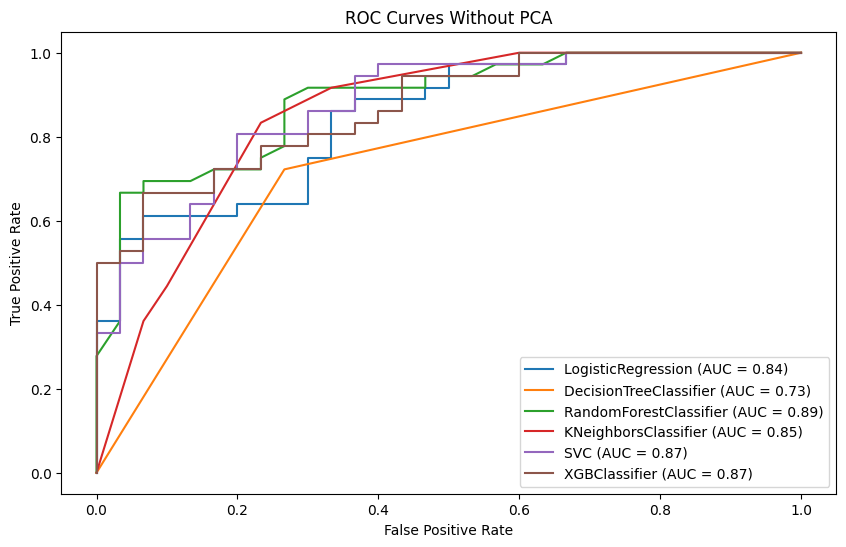

In [ ]:
# Train and Evaluate Models with Performance Metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print Metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    if auc:
        print(f"AUC: {auc:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Plot ROC Curve
    if auc:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')
    return accuracy, precision, recall, f1, auc

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate and Compare Models Without PCA
print("\nEvaluating Models Without PCA:")
results_without_pca = []
plt.figure(figsize=(10, 6))
for name, model in models.items():
    print(f"\n{name}:")
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    results_without_pca.append(metrics)
plt.title('ROC Curves Without PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()




Evaluating Models With PCA:

Logistic Regression:
Accuracy: 0.74
Precision: 0.81
Recall: 0.69
F1-Score: 0.75
AUC: 0.87
Confusion Matrix:
[[24  6]
 [11 25]]

Decision Tree:
Accuracy: 0.80
Precision: 0.77
Recall: 0.92
F1-Score: 0.84
AUC: 0.79
Confusion Matrix:
[[20 10]
 [ 3 33]]

Random Forest:
Accuracy: 0.82
Precision: 0.83
Recall: 0.83
F1-Score: 0.83
AUC: 0.91
Confusion Matrix:
[[24  6]
 [ 6 30]]

KNN:
Accuracy: 0.80
Precision: 0.83
Recall: 0.81
F1-Score: 0.82
AUC: 0.84
Confusion Matrix:
[[24  6]
 [ 7 29]]

SVM:
Accuracy: 0.76
Precision: 0.79
Recall: 0.75
F1-Score: 0.77
AUC: 0.87
Confusion Matrix:
[[23  7]
 [ 9 27]]

XGBoost:
Accuracy: 0.83
Precision: 0.84
Recall: 0.86
F1-Score: 0.85
AUC: 0.88
Confusion Matrix:
[[24  6]
 [ 5 31]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:44:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


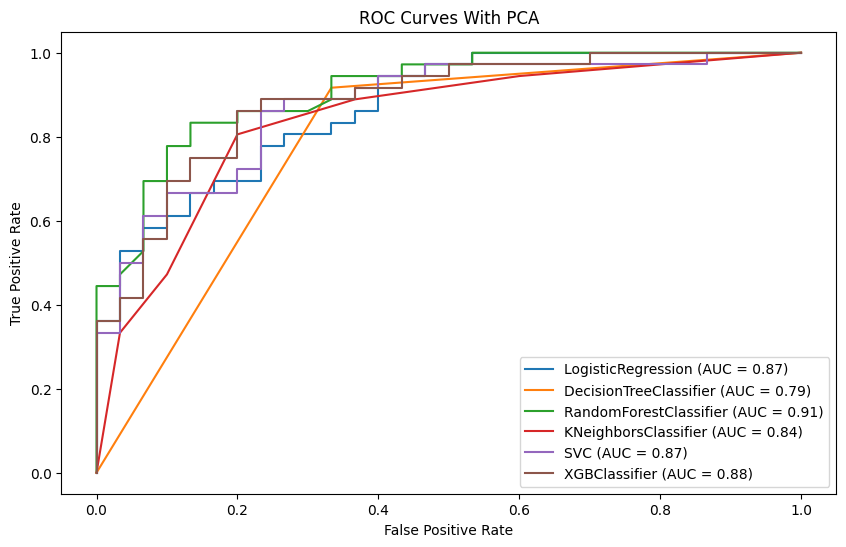

In [ ]:
# Evaluate and Compare Models With PCA
print("\nEvaluating Models With PCA:")
results_with_pca = []
plt.figure(figsize=(10, 6))
for name, model in models.items():
    print(f"\n{name}:")
    metrics = evaluate_model(model, X_train_pca, X_test_pca, y_train_pca, y_test_pca)
    results_with_pca.append(metrics)
plt.title('ROC Curves With PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

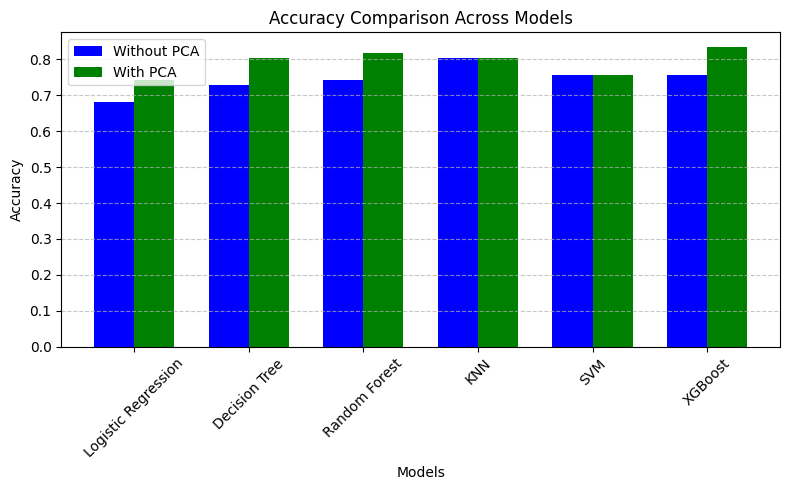

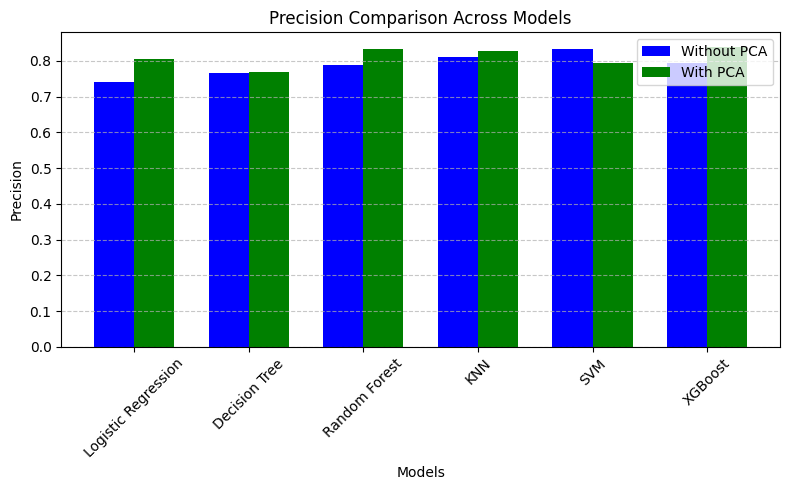

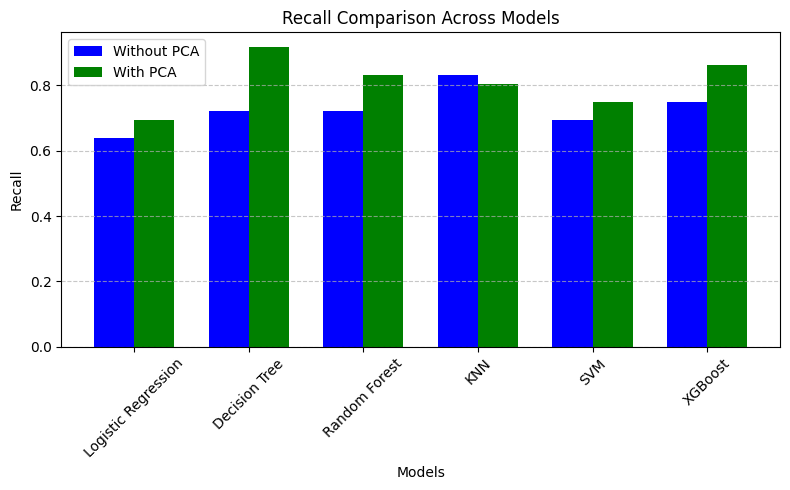

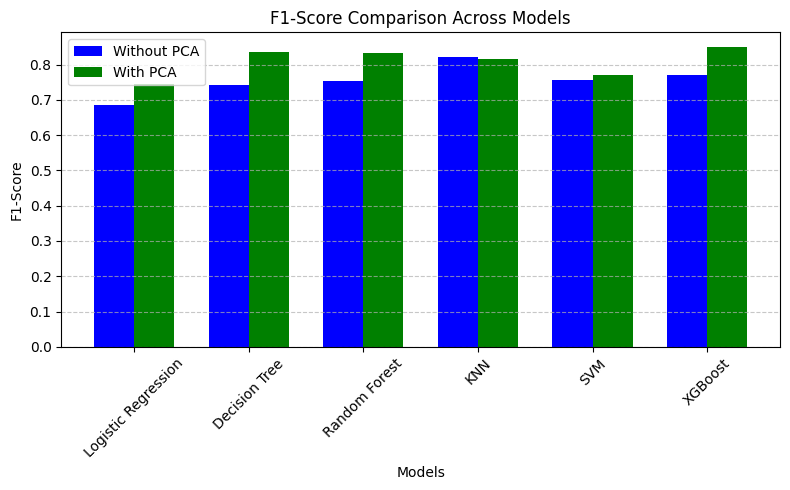

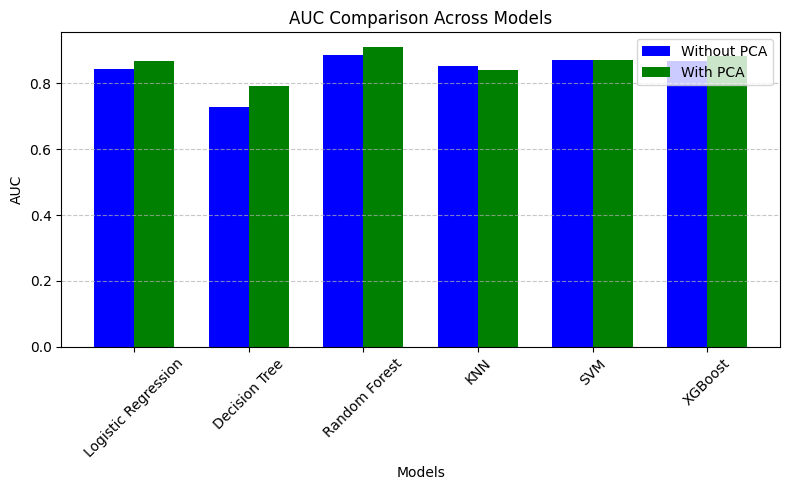

In [ ]:
# Convert Results to DataFrame for Visualization
columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
results_without_pca_df = pd.DataFrame(results_without_pca, columns=columns, index=models.keys())
results_with_pca_df = pd.DataFrame(results_with_pca, columns=columns, index=models.keys())

# Plot Comparison of Metrics as Bar Graphs
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = range(len(models))  # X-axis positions for models
width = 0.35  # Width of each bar

for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.bar(x, results_without_pca_df[metric], width, label='Without PCA', color='blue')
    plt.bar([i + width for i in x], results_with_pca_df[metric], width, label='With PCA', color='green')

    # Add titles and labels
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.xticks([i + width / 2 for i in x], models.keys(), rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
